#TP2 - HMM - SD-TSIA214

PEREIRA FERNANDES Lucas - DE MENEZES LIMA Marina

June 2022 - Telecom Paris

In this lab we will build an email segmentation tool, dedicated to separate the email header (state 0) from its body (state 1) by using a Hidden Markov Model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!gdown --id 1e5QC2gq1SB8s7KQAiORChO0pnhJccs2q
!unzip PerlScriptAndModel.zip
!rm PerlScriptAndModel.zip

In [ ]:
!gdown --id 16fjTv0BC61p3x3qJqLet5zqbuJ42d29e
!unzip dat.zip
!rm dat.zip

### **Question 1**

As we are working with only 2 states and every email has and starts in a header, our $\pi$ vector of the inital probabilities is:

$$ \pi_0 = \begin{bmatrix}
1 & 0 
\end{bmatrix} $$

In [ ]:
pi0 = np.array([1,0])
pi0

array([1, 0])

### **Question 2**

Considering the given transition matrix 

$$ A = \begin{bmatrix}
0.999218078035812 &  0.000781921964187974 \\ 
0 & 1 
\end{bmatrix} $$

we can see that the probability to move from state 1 to state 2 is 0.000781921964187974, while the one to remain in state 2 is equal to 1. 

We can understand those probabilities by analysing our problem. The probability to stay in the state 1 is almost one (0.999218078035812) because most of the time we are going to have a next character that is also in the header. The only exception to this case is the point of transition, that happens only one time and is represented by the probability 0.000781921964187974. As being in the state 2 also means that we cannot change our state, the probability of changing from 2 to 1 is 0, while the one to stay in state 2 is always 1.

In [ ]:
A = np.array([[0.999218078035812, 0.000781921964187974], [0, 1]])
A

array([[9.99218078e-01, 7.81921964e-04],
       [0.00000000e+00, 1.00000000e+00]])

### **Question 3**

The matrix B has N rows (number of different characters) and 2 columns (number of states).

In [ ]:
B = np.loadtxt('PerlScriptAndModel/P.text')

In [ ]:
B.shape

(256, 2)

We can also visualize the probability of occurrence of each ASCII Character in the text for both the header and the body:

In [ ]:
B = B.T

Text(0.5, 1.0, 'ASCII Character probability of occurrence')

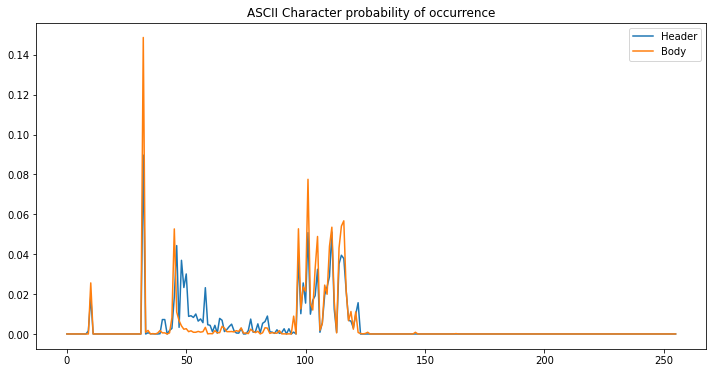

In [ ]:
plt.figure(figsize=(12,6)) 
plt.plot(B.T)
plt.legend(['Header', 'Body'])
plt.title('ASCII Character probability of occurrence')

### **Question 4**

For this part of the project we are going to implement the Viterbi algorithm, that takes as argument a vector of observations and the parameters of the model and returns a vector of states representing the most probable sequence. We will then  test it on some mails that are given in the dat directory (especially mail11.txt to mail30.txt) and use the function given to visualize the segmentation.

In [ ]:
def viterbi(X, A, B, pi0):

    ex = 1e-30
    A = np.log(A+ex)
    B = np.log(B+ex)
    pi0 = np.log(pi0+ex)

    n = A.shape[0] 
    T = len(X)

    delta = np.zeros((n, T), dtype=np.float64)
    phi = np.zeros((n, T), dtype=np.int8) 

    delta[:, 0] = pi0 + B[:, X[0]] 
    
    for i in range(1, T):
        delta[:, i] = np.max(delta[:, i-1] + A.T, axis=1) + B[:, X[i]]
        phi[:, i] = np.argmax(delta[:, i-1] + A.T, axis=1)

    x = np.zeros(T, dtype=np.int)
    x[-1] = np.argmax(delta[:, T-1])
    
    for i in range(T-2,-1,-1):
        x[i] = phi[x[i+1], i+1]
    x += 1
    return x, delta, phi

In [ ]:
data = []
for i in range(11,31):
    data.append(np.loadtxt(f'dat/mail{i}.dat', dtype=int))

In [ ]:
paths = []
for item in data:
  paths.append(viterbi(item, A, B, pi0)[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
paths[0]

array([1, 1, 1, ..., 2, 2, 2])

In [ ]:
def visualize_segmentation(mail_filename, visualized_mail_filename, path):
	## @parameter mail_filename : Path to the mail on wich we try the algorithm.
	## @parameter visualized_mail_filename : The path on which we write the mail with the v 	## @parameter path : The sequence of 0 and 1 that the Viterbi algorithm returns.
    ## return: True if the header corresponds to the
  i=0
  while path[i] == 1:
    i+=1
    visu = open(visualized_mail_filename, 'w') 
    if(mail_filename.endswith(".dat")):
      mail_filename = mail_filename[:-4] + ".txt" 
    mail = open(mail_filename, 'r')
    header = mail.read(i)
    visu.write(header) 
    visu.write("\n===================== cut here\n") 
    visu.write(mail.read(path.sum()))
  visu.close() 
  mail.close() 
  return

In [ ]:
visualize_segmentation("dat/mail13.dat", 'path_test.txt', paths[2])

In [ ]:
!cd PerlScriptAndModel/; perl segment.pl ../dat/mail11.txt ../path_test.txt

From ilug-admin@linux.ie  Thu Aug 22 16:27:21 2002
From ilug-admin@linux.ie  Thu Aug 22 16:27:21 2002
Return-Path: <ilug-admin@linux.ie>
From ilug-admin@linux.ie  Thu Aug 22 16:27:21 2002
Return-Path: <ilug-admin@linux.ie>
Delivered-To: zzzz@localhost.netnoteinc.com
From ilug-admin@linux.ie  Thu Aug 22 16:27:21 2002
Return-Path: <ilug-admin@linux.ie>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
From ilug-admin@linux.ie  Thu Aug 22 16:27:21 2002
Return-Path: <ilug-admin@linux.ie>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id 7A28A43F99
From ilug-admin@linux.ie  Thu Aug 22 16:27:21 2002
Return-Path: <ilug-admin@linux.ie>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id 7A28A43F99
	for <zzzz@localhost>; Thu, 22 Aug 2002 11:27:21 -0400 (EDT)
Fro

In [ ]:
!cd PerlScriptAndModel/; perl segment.pl ../dat/mail13.txt ../path_test.txt

From ilug-admin@linux.ie  Thu Aug 22 16:27:21 2002
From ilug-admin@linux.ie  Thu Aug 22 16:27:21 2002
Return-Path: <ilug-admin@linux.ie>
From ilug-admin@linux.ie  Thu Aug 22 16:27:21 2002
Return-Path: <ilug-admin@linux.ie>
Delivered-To: zzzz@localhost.netnoteinc.com
From ilug-admin@linux.ie  Thu Aug 22 16:27:21 2002
Return-Path: <ilug-admin@linux.ie>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
From ilug-admin@linux.ie  Thu Aug 22 16:27:21 2002
Return-Path: <ilug-admin@linux.ie>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id 7A28A43F99
From ilug-admin@linux.ie  Thu Aug 22 16:27:21 2002
Return-Path: <ilug-admin@linux.ie>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id 7A28A43F99
	for <zzzz@localhost>; Thu, 22 Aug 2002 11:27:21 -0400 (EDT)
Fro

After visualizing the results for some cases we are able to conclude that the algorithm worked well for most of them. Besides some of the transitions were a little to early or a little to late, none of the ones we saw were really far from the real position of the transition.

### **Question 5**

If the segmentation problem consisted in X (>2) parts, we would have X classes. That means that the dimentions of our matrices would change to $\pi = (1,X)$,  $A = (X,X)$ and $B = (N, X)$, but this would not change our algorithm. 

We can also affirm that the matrix $\pi$ would continue to have the first value as 1 and the others one as 0. For the matrix $A$, most of the values from the diagonal are going to be really small with the only exception being the element $A_{X,X}$, that is always going to be 1.

### **Question 6**

When we answer an mail, a called 'included mail' appears in the text, always beginning with the symbol '$\gt$'. This part can cause some errors in the indentification of the head and the body of the mail.

In those cases, we can model this 'included mail' as a third state. The major difference between this new state and the other ones is that it is possible to go out and come back to it. For example, the format (Head - Body - Included - Body) is possible, making this state the only one where both transitions are possible.

In practice, the only thing this will affect the problem in that the transition matrix will have a non-null element under the diagonal (probability of going from the Included state to the Body state).



